In [7]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3
import os

current_dir = os.getcwd()
fractions_file = os.path.join(current_dir, 'fractions.py')

if os.path.isfile(fractions_file):
    os.remove(fractions_file)


from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split


warnings.simplefilter(action="ignore", category=FutureWarning)

ImportError: cannot import name 'gcd' from 'fractions' (C:\Users\chimi\anaconda3\lib\fractions.py)

In [ ]:
print(f"Running on PyMC3 v{pm.__version__}")


In [5]:
crime_data = pd.read_csv('pivot_crime+unemployed+education_rate.csv')

In [6]:
crime_data.head(5)

,Territory,Year,arson,attacks,attempted homicides,bag-snatching,bank robbery,blows,burglary,car theft,...,theft of cargo trucks carrying freights,thefts,total_crime,trafficking and drugs possession,unintentional homicides,usury,all_levels_education,"no educational degree, primary and lower secondary school certificate","tertiary (university, doctoral and specialization courses)",upper and post secondary
0,Abruzzo,2018,7.1,0.5,1.8,6.8,0.2,17.6,233.4,100.7,...,1.8,1308.0,3738.3,59.5,2.4,0.8,32.680126,38.316768,26.000501,32.326421
1,Abruzzo,2019,10.2,0.3,1.2,5.2,0.5,18.1,225.1,87.6,...,2.1,1132.8,3638.4,62.7,2.8,0.9,33.694878,34.987350,27.590430,35.703947
2,Abruzzo,2020,11.4,0.5,1.1,5.5,0.2,18.6,141.4,64.9,...,0.5,781.3,3371.4,51.2,4.2,1.2,29.198303,35.245624,27.273220,26.777367
3,Abruzzo,2021,12.5,0.1,0.9,6.0,0.2,16.8,183.7,59.3,...,1.0,807.5,3457.9,48.9,3.9,0.5,28.190858,29.031811,24.533459,29.533889
4,Basilicata,2018,25.5,0.4,1.4,6.5,0.5,20.2,139.8,58.6,...,1.2,681.1,3168.2,44.1,3.9,0.2,37.607595,38.049563,32.146766,39.258222


In [7]:
crime_data.columns

Index(['Territory', 'Year', 'arson', 'attacks', 'attempted homicides',
       'bag-snatching', 'bank robbery', 'blows', 'burglary', 'car theft',
       'child pornography and possession of paedo-pornographic materials',
       'corruption of a minor',
       'counteractions of goods and industrial products',
       'criminal association', 'culpable injuries', 'cybercrime',
       'damage followed by arson', 'damages',
       'exploitation and abetting prostitution', 'extortions', 'forest arson',
       'homicides for theft or robbery', 'homicides from road accident',
       'homicides of mafia', 'house robbery', 'infanticides',
       'intellectual property violations', 'intentional homicides',
       'kidnappings', 'mafia criminal association', 'manslaughter',
       'mass murder', 'menaces', 'money laundering', 'moped theft',
       'motorcycle theft', 'offences', 'other crimes', 'pickpocketing',
       'post office robbery', 'receiving stolen goods', 'robberies',
       'sexual acti

In [8]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 62 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Territory                                                              128 non-null    object 
 1   Year                                                                   128 non-null    int64  
 2   arson                                                                  128 non-null    float64
 3   attacks                                                                128 non-null    float64
 4   attempted homicides                                                    128 non-null    float64
 5   bag-snatching                                                          128 non-null    float64
 6   bank robbery                                                           128 non-null    flo

In [9]:
pop_data = pd.read_csv('population_2011_2023.csv')

In [10]:
pop_data.head(5)

,Unnamed: 0,itter107,territory,year,value
0,0,ITF1,Abruzzo,2011,1329220
1,1,ITF1,Abruzzo,2012,1331624
2,2,ITF1,Abruzzo,2013,1332583
3,3,ITF1,Abruzzo,2014,1329918
4,4,ITF1,Abruzzo,2015,1325836


In [11]:
pop_data.shape

(1733, 5)

In [12]:
pop_data.columns

Index(['Unnamed: 0', 'itter107', 'territory', 'year', 'value'], dtype='object')

In [13]:
pop_data.info

<bound method DataFrame.info of       Unnamed: 0 itter107 territory  year    value
0              0     ITF1   Abruzzo  2011  1329220
1              1     ITF1   Abruzzo  2012  1331624
2              2     ITF1   Abruzzo  2013  1332583
3              3     ITF1   Abruzzo  2014  1329918
4              4     ITF1   Abruzzo  2015  1325836
...          ...      ...       ...   ...      ...
1728        1728    ITE41   Viterbo  2019   311761
1729        1729    ITE41   Viterbo  2020   309795
1730        1730    ITE41   Viterbo  2021   308830
1731        1731    ITE41   Viterbo  2022   308737
1732        1732    ITE41   Viterbo  2023   307446

[1733 rows x 5 columns]>

In [14]:
pop_data.isnull().sum()

Unnamed: 0    0
itter107      0
territory     0
year          0
value         0
dtype: int64

In [15]:
pop_data.duplicated().sum()

0

In [16]:
pop_data.rename(columns={'territory':'Territory','year':'Year'},inplace=True)

In [17]:
pop_data.head(5)

,Unnamed: 0,itter107,Territory,Year,value
0,0,ITF1,Abruzzo,2011,1329220
1,1,ITF1,Abruzzo,2012,1331624
2,2,ITF1,Abruzzo,2013,1332583
3,3,ITF1,Abruzzo,2014,1329918
4,4,ITF1,Abruzzo,2015,1325836


In [18]:
merged_data = pd.merge(crime_data,pop_data , on=['Territory', 'Year'])

In [19]:
merged_data.head(5)

,Territory,Year,arson,attacks,attempted homicides,bag-snatching,bank robbery,blows,burglary,car theft,...,trafficking and drugs possession,unintentional homicides,usury,all_levels_education,"no educational degree, primary and lower secondary school certificate","tertiary (university, doctoral and specialization courses)",upper and post secondary,Unnamed: 0,itter107,value
0,Abruzzo,2018,7.1,0.5,1.8,6.8,0.2,17.6,233.4,100.7,...,59.5,2.4,0.8,32.680126,38.316768,26.000501,32.326421,7,ITF1,1306059
1,Abruzzo,2019,10.2,0.3,1.2,5.2,0.5,18.1,225.1,87.6,...,62.7,2.8,0.9,33.694878,34.987350,27.590430,35.703947,8,ITF1,1300645
2,Abruzzo,2020,11.4,0.5,1.1,5.5,0.2,18.6,141.4,64.9,...,51.2,4.2,1.2,29.198303,35.245624,27.273220,26.777367,9,ITF1,1293941
3,Abruzzo,2021,12.5,0.1,0.9,6.0,0.2,16.8,183.7,59.3,...,48.9,3.9,0.5,28.190858,29.031811,24.533459,29.533889,10,ITF1,1281012
4,Basilicata,2018,25.5,0.4,1.4,6.5,0.5,20.2,139.8,58.6,...,44.1,3.9,0.2,37.607595,38.049563,32.146766,39.258222,137,ITF5,562968


In [20]:
merged_data.rename(columns={'value':'Population'},inplace=True)

In [21]:
merged_data.head(5)

,Territory,Year,arson,attacks,attempted homicides,bag-snatching,bank robbery,blows,burglary,car theft,...,trafficking and drugs possession,unintentional homicides,usury,all_levels_education,"no educational degree, primary and lower secondary school certificate","tertiary (university, doctoral and specialization courses)",upper and post secondary,Unnamed: 0,itter107,Population
0,Abruzzo,2018,7.1,0.5,1.8,6.8,0.2,17.6,233.4,100.7,...,59.5,2.4,0.8,32.680126,38.316768,26.000501,32.326421,7,ITF1,1306059
1,Abruzzo,2019,10.2,0.3,1.2,5.2,0.5,18.1,225.1,87.6,...,62.7,2.8,0.9,33.694878,34.987350,27.590430,35.703947,8,ITF1,1300645
2,Abruzzo,2020,11.4,0.5,1.1,5.5,0.2,18.6,141.4,64.9,...,51.2,4.2,1.2,29.198303,35.245624,27.273220,26.777367,9,ITF1,1293941
3,Abruzzo,2021,12.5,0.1,0.9,6.0,0.2,16.8,183.7,59.3,...,48.9,3.9,0.5,28.190858,29.031811,24.533459,29.533889,10,ITF1,1281012
4,Basilicata,2018,25.5,0.4,1.4,6.5,0.5,20.2,139.8,58.6,...,44.1,3.9,0.2,37.607595,38.049563,32.146766,39.258222,137,ITF5,562968


In [22]:
merged_data.drop(columns=['itter107','Unnamed: 0'],inplace=True)

In [23]:
merged_data.head(5)

,Territory,Year,arson,attacks,attempted homicides,bag-snatching,bank robbery,blows,burglary,car theft,...,thefts,total_crime,trafficking and drugs possession,unintentional homicides,usury,all_levels_education,"no educational degree, primary and lower secondary school certificate","tertiary (university, doctoral and specialization courses)",upper and post secondary,Population
0,Abruzzo,2018,7.1,0.5,1.8,6.8,0.2,17.6,233.4,100.7,...,1308.0,3738.3,59.5,2.4,0.8,32.680126,38.316768,26.000501,32.326421,1306059
1,Abruzzo,2019,10.2,0.3,1.2,5.2,0.5,18.1,225.1,87.6,...,1132.8,3638.4,62.7,2.8,0.9,33.694878,34.987350,27.590430,35.703947,1300645
2,Abruzzo,2020,11.4,0.5,1.1,5.5,0.2,18.6,141.4,64.9,...,781.3,3371.4,51.2,4.2,1.2,29.198303,35.245624,27.273220,26.777367,1293941
3,Abruzzo,2021,12.5,0.1,0.9,6.0,0.2,16.8,183.7,59.3,...,807.5,3457.9,48.9,3.9,0.5,28.190858,29.031811,24.533459,29.533889,1281012
4,Basilicata,2018,25.5,0.4,1.4,6.5,0.5,20.2,139.8,58.6,...,681.1,3168.2,44.1,3.9,0.2,37.607595,38.049563,32.146766,39.258222,562968


In [24]:
# Calculate crime rate million per population
scaling_factor = 1000000  # Scale the population to represent it in millions

merged_data['Crime Rate (per Million)'] = (merged_data['total_crime'] / merged_data['Population']) * scaling_factor


In [25]:
merged_data.columns

Index(['Territory', 'Year', 'arson', 'attacks', 'attempted homicides',
       'bag-snatching', 'bank robbery', 'blows', 'burglary', 'car theft',
       'child pornography and possession of paedo-pornographic materials',
       'corruption of a minor',
       'counteractions of goods and industrial products',
       'criminal association', 'culpable injuries', 'cybercrime',
       'damage followed by arson', 'damages',
       'exploitation and abetting prostitution', 'extortions', 'forest arson',
       'homicides for theft or robbery', 'homicides from road accident',
       'homicides of mafia', 'house robbery', 'infanticides',
       'intellectual property violations', 'intentional homicides',
       'kidnappings', 'mafia criminal association', 'manslaughter',
       'mass murder', 'menaces', 'money laundering', 'moped theft',
       'motorcycle theft', 'offences', 'other crimes', 'pickpocketing',
       'post office robbery', 'receiving stolen goods', 'robberies',
       'sexual acti

In [28]:
# Feature selection sample analysis
# Feature selection sample analysis
X = merged_data.drop('total_crime', axis=1)
y = merged_data['total_crime']

# 1. Correlation Analysis
correlation_matrix = merged_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 2. Feature Importance using Random Forests
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# 3. Univariate Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
feature_scores = selector.scores_
print("\nFeature Scores:")
for feature, score in zip(X.columns, feature_scores):
    print(f"{feature}: {score}")

# 4. Lasso Regularization
lasso_model = LassoCV()
lasso_model.fit(X, y)
lasso_coefficients = lasso_model.coef_
print("\nLasso Coefficients:")
for feature, coefficient in zip(X.columns, lasso_coefficients):
    print(f"{feature}: {coefficient}")

# 5. Train-Test Split for Expert Opinion and Iterative Refinement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Correlation Matrix:
                                                        Year     arson  \
Year                                                1.000000  0.088282   
arson                                               0.088282  1.000000   
attacks                                            -0.343486  0.121830   
attempted homicides                                -0.110685  0.323721   
bag-snatching                                      -0.451354 -0.185912   
...                                                      ...       ...   
no educational degree, primary and lower second...  0.545960  0.263976   
tertiary (university, doctoral and specializati...  0.502571  0.434443   
upper and post secondary                            0.533487  0.326829   
Population                                         -0.448829 -0.026982   
Crime Rate (per Million)                            0.137849  0.013878   

                                                     attacks  \
Year                       

ValueError: could not convert string to float: 'Abruzzo'

In [ ]:
# Exploring Total Crime as the target variable using Bayesian Model
# Considering all the results, 'damages', 'shoplifting', 'burglary', 'pickpocketing',
# and 'menaces. These feature share a  correlation values, feature importances, and 
# feature scores compared to others.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\chimi\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\chimi\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, coeffs, intercept]


C:\Users\chimi\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\chimi\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\chimi\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\chimi\anaconda3\lib\site-packages\theano\scalar\basic.py:1955: RuntimeWarning: invalid value encountered in true_divide
  return x / y


C:\Users\chimi\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\chimi\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\chimi\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\chimi\anaconda3\lib\site-packages\theano\scalar\basic.py:1955: RuntimeWarning: invalid value encountered in true_divide
  return x / y
C:\Users\chimi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1788 seconds.
The acceptance probability does not match the target. It is 0.89225452537298

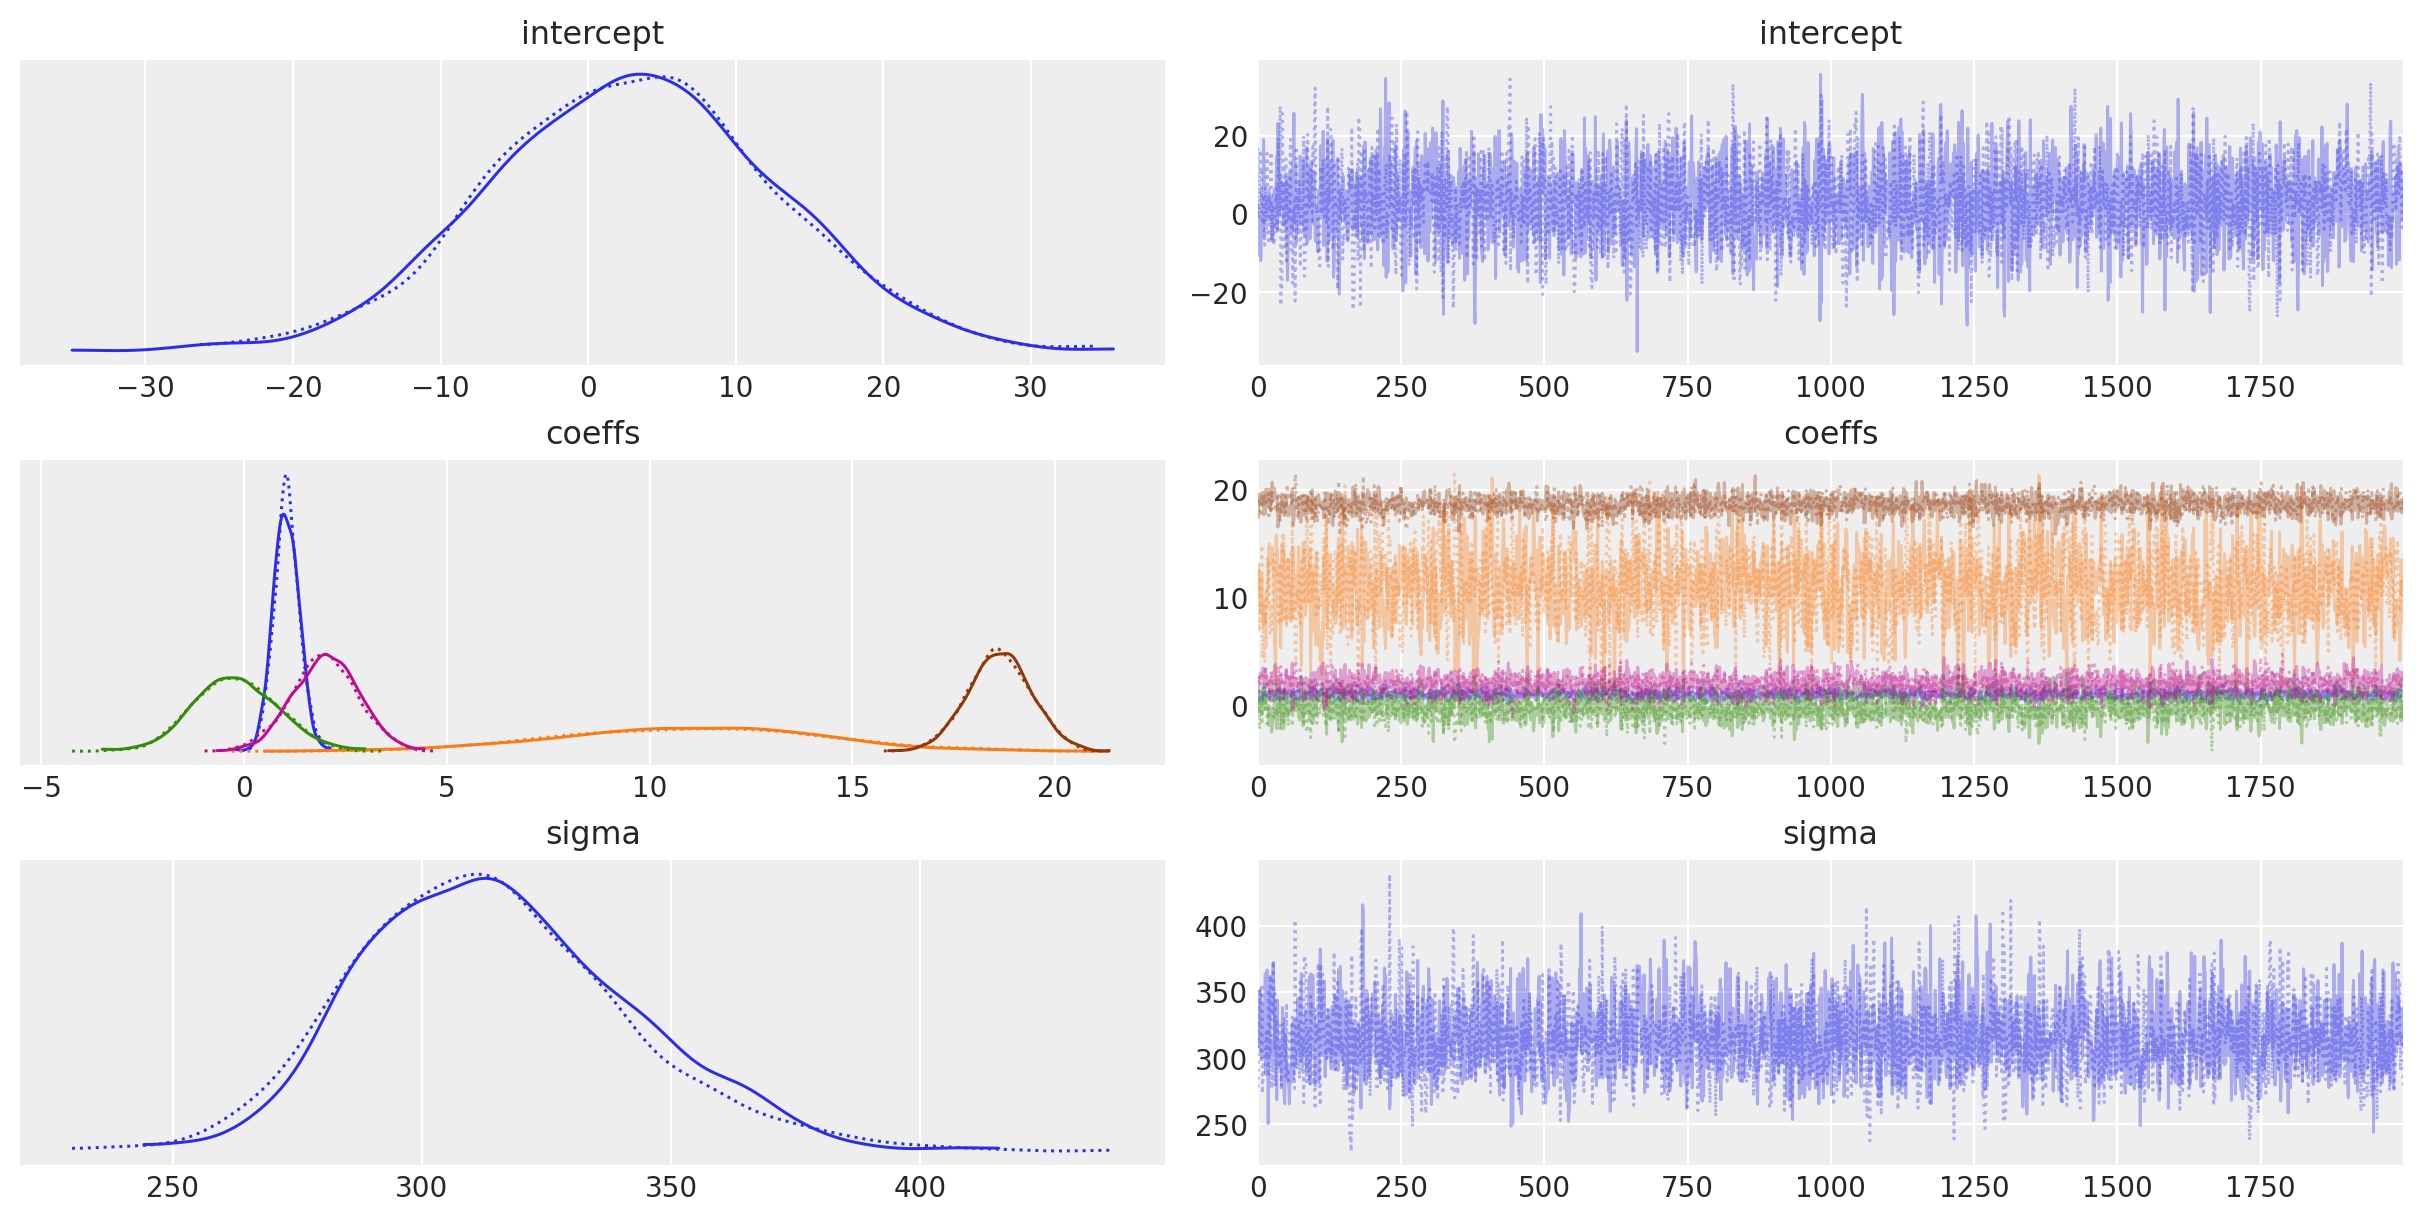

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\chimi\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Mean Squared Error (MSE): 2509823.2526568193
Mean Absolute Error (MAE): 1273.511816255262


In [84]:

predictors = ['damages', 'shoplifting', 'burglary', 'pickpocketing', 'menaces']
target = 'total_crime'

X = merged_data[predictors].values
y = merged_data[target].values

# Split the data into training and testing sets (70-30 split)
train_size = int(0.7 * len(merged_data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#  Model Specification
with pm.Model() as model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sd=10)
    coeffs = pm.Normal('coeffs', mu=0, sd=10, shape=len(predictors))
    sigma = pm.HalfCauchy('sigma', beta=10)
    
    # Linear regression equation
    mu = intercept + pm.math.dot(X_train, coeffs)
    
    # Likelihood function
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=y_train)
    
# Model Fitting
with model:
    trace = pm.sample(2000, tune=1000, cores=1)  # Perform MCMC sampling

#  Model Evaluation
pm.traceplot(trace)
plt.show()

#  Interpretation and Inference
pm.summary(trace).round(2)  # Display summary statistics and credible intervals

#  Prediction
with model:
    # Use the trained model to make predictions on the test set
    y_pred = pm.sample_posterior_predictive(trace, samples=500)['y_obs']

# Reshape y_test to match the shape of y_pred.mean(axis=0)
y_test_reshaped = np.repeat(y_test[:, np.newaxis], y_pred.shape[1], axis=1)

# Assess the performance metrics
mse = np.mean((y_pred.mean(axis=0) - y_test_reshaped) ** 2)
mae = np.mean(np.abs(y_pred.mean(axis=0) - y_test_reshaped))

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)



C:\Users\chimi\AppData\Local\Temp\ipykernel_11528\851248946.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


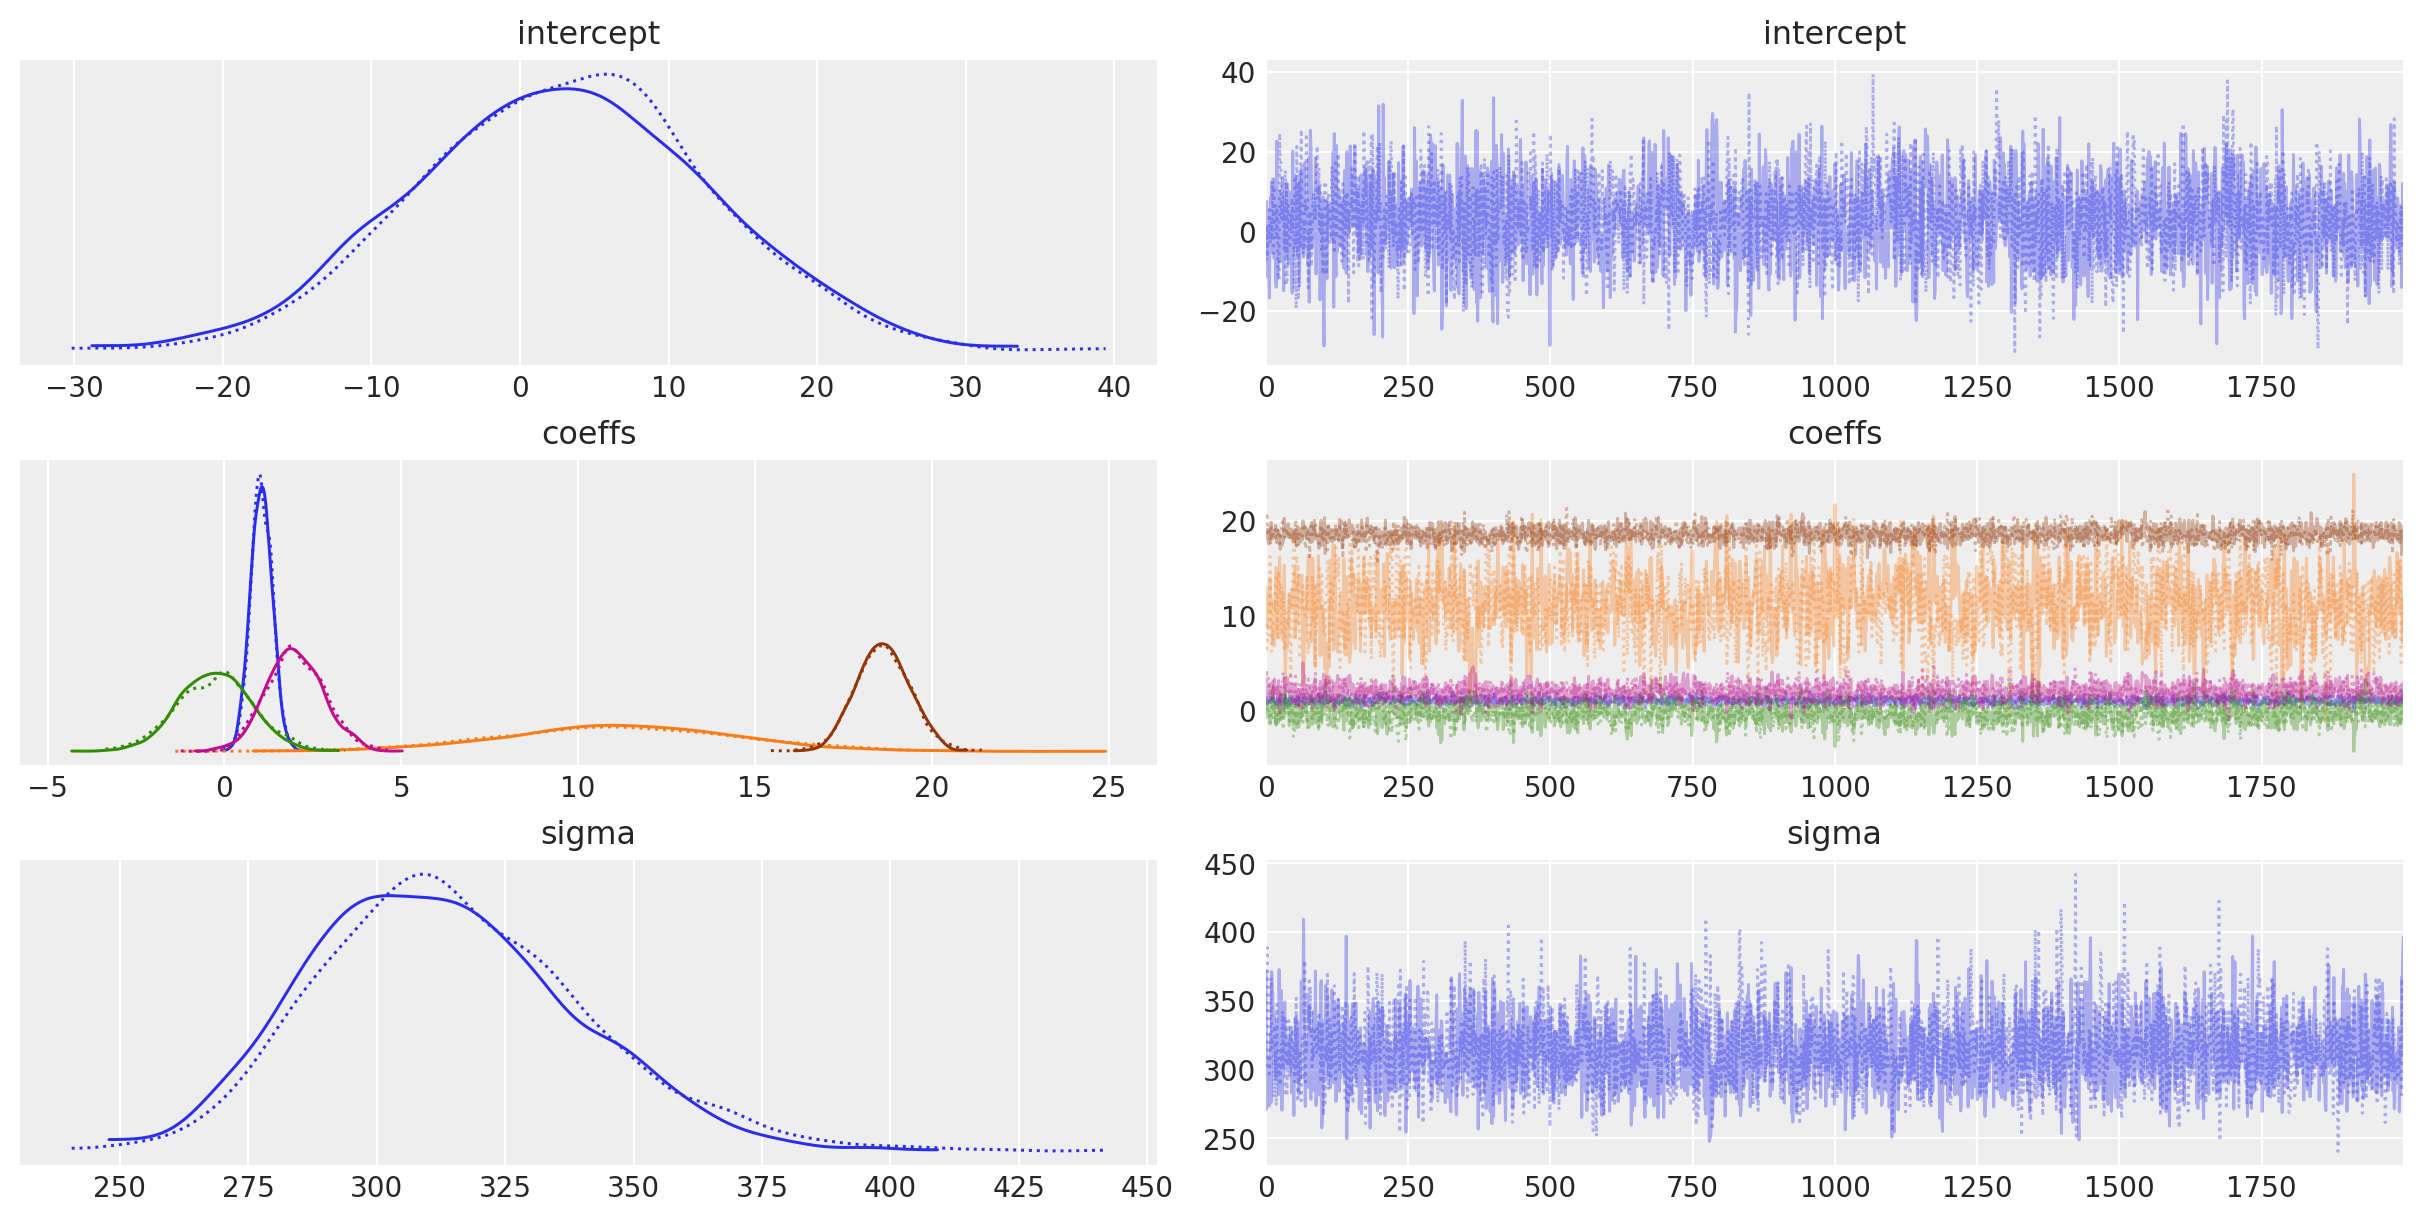

In [82]:
pm.traceplot(trace)
plt.show()

In [83]:
# Step 5: Interpretation and Inference
pm.summary(trace).round(2)  # Display summary statistics and credible interval

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,2.91,9.92,-14.84,22.06,0.18,0.15,3006.0,2777.0,1.0
coeffs[0],1.04,0.30,0.47,1.60,0.01,0.00,2330.0,2615.0,1.0
coeffs[1],11.14,3.31,5.18,17.79,0.09,0.06,1310.0,1701.0,1.0
coeffs[2],-0.26,1.05,-2.13,1.82,0.03,0.02,1605.0,2137.0,1.0
coeffs[3],2.01,0.81,0.53,3.55,0.02,0.02,1621.0,1896.0,1.0
coeffs[4],18.62,0.76,17.29,20.11,0.02,0.01,2247.0,2905.0,1.0
sigma,313.77,25.85,267.38,362.16,0.50,0.36,2587.0,2760.0,1.0


In [ ]:
# Assess the performance metrics
mse = np.mean((y_pred.mean(axis=0) - y_test) ** 2)
mae = np.mean(np.abs(y_pred.mean(axis=0) - y_test))

In [88]:
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error (MSE): 2509823.2526568193
Mean Absolute Error (MAE): 1273.511816255262


In [27]:
# Taking these variables into account 
# "sexual violence", "swindles and cyber frauds", "other crimes", "culpable injuries", "total_crime", and "Population"
# Unable to explore it using crime rate per million. 
# I am getting errors